In [5]:
# imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from os import (environ, path)
import sys
import calendar
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv(path.join(environ['DATA_FOLDER'], "train_sample.csv.zip"))
print(df.head(5))
print(df.dtypes)

       ip  app  device  os  channel           click_time attributed_time  \
0   87540   12       1  13      497  2017-11-07 09:30:38             NaN   
1  105560   25       1  17      259  2017-11-07 13:40:27             NaN   
2  101424   12       1  19      212  2017-11-07 18:05:24             NaN   
3   94584   13       1  13      477  2017-11-07 04:58:08             NaN   
4   68413   12       1   1      178  2017-11-09 09:00:09             NaN   

   is_attributed  
0              0  
1              0  
2              0  
3              0  
4              0  
ip                  int64
app                 int64
device              int64
os                  int64
channel             int64
click_time         object
attributed_time    object
is_attributed       int64
dtype: object


In [49]:
click_count_this_ip_this_app = df.groupby(['ip','app']).count()['click_time'].rename('click_count_this_ip_this_app')
df_2 = df.join(click_count_this_ip_this_app, on=['ip', 'app'])

print(df_2.head())

       ip  app  device  os  channel           click_time attributed_time  \
0   87540   12       1  13      497  2017-11-07 09:30:38             NaN   
1  105560   25       1  17      259  2017-11-07 13:40:27             NaN   
2  101424   12       1  19      212  2017-11-07 18:05:24             NaN   
3   94584   13       1  13      477  2017-11-07 04:58:08             NaN   
4   68413   12       1   1      178  2017-11-09 09:00:09             NaN   

   is_attributed  click_count_this_ip_this_app  
0              0                             3  
1              0                             4  
2              0                             1  
3              0                             1  
4              0                             2  


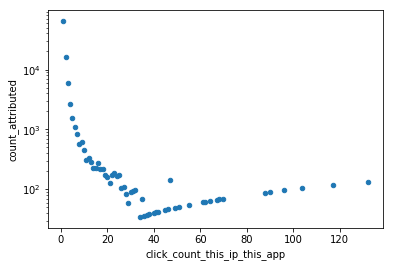

In [88]:
df_3 = df_2.groupby(['click_count_this_ip_this_app']).count()['is_attributed'].rename('count_attributed').reset_index()
df_3.plot(x='click_count_this_ip_this_app', y='count_attributed', kind='scatter', logy=True)